In [264]:
import pandas as pd
import os

In [265]:
file_paths={
16 : 'D:/Desktop/Data/Shipments and Orders 2016.csv',
17 : 'D:/Desktop/Data/Shipments and Orders 2017.csv',
18 : 'D:/Desktop/Data/Shipments and Orders 2018.csv',
19 : 'D:/Desktop/Data/Shipments and Orders 2019.csv',
20 : 'D:/Desktop/Data/Shipments and Orders 2020.csv',
21 : 'D:/Desktop/Data/Shipments and Orders 2021.csv',
22 : 'D:/Desktop/Data/Shipments and Orders 2022.csv',
23 : 'D:/Desktop/Data/Shipments and Orders 2023.csv',
# 24 : 'D:/Desktop/Data/Shipments and Orders 2024 may.csv',
}

In [266]:
years = range(16,23)
dataframes = {}

for year,path in file_paths.items():
    try:
        dataframes[year] = pd.read_csv(path)
    except FileNotFoundError:
        print(f"file not found : {path}")
    

KeyboardInterrupt: 

In [ ]:
for item in dataframes.items():
    print(item)

(16,         Year Month Name         Week Week Start Date  4 Week Ago Forecast  \
0       2016    January  2016 Week01      2016-01-01                  NaN   
1       2016    January  2016 Week01      2016-01-01                  NaN   
2       2016    January  2016 Week01      2016-01-01                  NaN   
3       2016    January  2016 Week01      2016-01-01                  NaN   
4       2016    January  2016 Week01      2016-01-01                  NaN   
...      ...        ...          ...             ...                  ...   
456052  2016   December  2016 Week53      2016-12-25                  NaN   
456053  2016   December  2016 Week53      2016-12-25                  NaN   
456054  2016   December  2016 Week53      2016-12-25                  NaN   
456055  2016   December  2016 Week53      2016-12-25                  NaN   
456056  2016   December  2016 Week53      2016-12-25                  NaN   

       Plant Location Name Sales Channel Code                   Custom

In [ ]:
from pathlib import Path
new_file_path = Path('D:/Desktop/Data/concatCSV.csv')

if not new_file_path.exists() : 
    new_file_path.touch()

combined_df = pd.concat(dataframes.values(), ignore_index=True)
combined_df.to_csv(new_file_path)
    


In [ ]:
combined_df.columns

Index(['Year', 'Month Name', 'Week', 'Week Start Date', '4 Week Ago Forecast',
       'Plant Location Name', 'Sales Channel Code', 'Customer Name',
       'Ship To Location State', 'Ship To Location City', 'Report Group ID',
       'Ship To Location Country', 'Store Number', 'Site Number',
       'Product Group', 'Product Market', 'Product Class', 'Family Group',
       'Family Type/Base Model', 'Fuel Type', 'Product Number',
       'Ordered Quantity', 'Gross Sales Qty', 'Sales Org Name', 'SrNo',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')

In [ ]:
filtered_df = combined_df[['Product Number','Year','Week','Month Name','Week Start Date','Plant Location Name','Ship To Location Country','Ship To Location State','Ship To Location City','Ordered Quantity','Family Group','Product Class','Product Market','Product Group']]

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3690316 entries, 0 to 3690315
Data columns (total 14 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Product Number            object 
 1   Year                      int64  
 2   Week                      object 
 3   Month Name                object 
 4   Week Start Date           object 
 5   Plant Location Name       object 
 6   Ship To Location Country  object 
 7   Ship To Location State    object 
 8   Ship To Location City     object 
 9   Ordered Quantity          float64
 10  Family Group              object 
 11  Product Class             object 
 12  Product Market            object 
 13  Product Group             object 
dtypes: float64(1), int64(1), object(12)
memory usage: 394.2+ MB


In [ ]:
filtered_df.head()

,Product Number,Year,Week,Month Name,Week Start Date,Plant Location Name,Ship To Location Country,Ship To Location State,Ship To Location City,Ordered Quantity,Family Group,Product Class,Product Market,Product Group
0,664453,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,GA,Evans,1.00,MARATHON,ELECTRIC,RESIDENTIAL,WATER HEATING
1,636351,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,IL,Orland Park,1.00,ATMOSPHERIC,GAS,RESIDENTIAL,WATER HEATING
2,664606,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,IN,Jasper,1.00,MARATHON SPEC,ELECTRIC,COMMERCIAL,WATER HEATING
3,635880,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,MA,Leominster,1.00,MARATHON,ELECTRIC,RESIDENTIAL,WATER HEATING
4,473369,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,PA,COATESVILLE,1.00,MARATHON,ELECTRIC,RESIDENTIAL,WATER HEATING


In [ ]:
missing = filtered_df['Product Number'].isnull().value_counts()
print(missing)

Product Number
False    3673792
True       16524
Name: count, dtype: int64


# *PROCESS THE DATA*

In [ ]:
# null_productNo = pd.DataFrame()
# for index,row in filtered_df.iterrows():
#     if pd.isnull(row['Product Number']):
#         null_productNo=  pd.concat([null_productNo,pd.DataFrame([row])], ignore_index=True)
null_productNo = filtered_df[filtered_df['Product Number'].isnull()]
null_productNo.head(10)

,Product Number,Year,Week,Month Name,Week Start Date,Plant Location Name,Ship To Location Country,Ship To Location State,Ship To Location City,Ordered Quantity,Family Group,Product Class,Product Market,Product Group
8720,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,CA,NaN,SUDBURY,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8721,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,US,CO,BRIGHTON,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8722,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,US,NY,Albany,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8723,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,US,GA,ATLANTA,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8730,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,NaN,NaN,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8731,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,NaN,NaN,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8732,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,NaN,NaN,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8737,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,NaN,NaN,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8748,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,NaN,NaN,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8749,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,NaN,NaN,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified


# Dropping the Rows which had no **Product Number** and other neccessary information.

In [ ]:
# filtered_df = pd.DataFrame(filtered_df)
filtered_df = filtered_df.dropna(subset=['Product Number'])
missing = filtered_df['Product Number'].isnull().value_counts()
print(missing)

Product Number
False    3673792
Name: count, dtype: int64


In [ ]:
filtered_df.count()

Product Number              3673792
Year                        3673792
Week                        3673792
Month Name                  3673792
Week Start Date             3673792
Plant Location Name         3673792
Ship To Location Country    3615346
Ship To Location State      3591116
Ship To Location City       3615339
Ordered Quantity            2374994
Family Group                3673583
Product Class               3673792
Product Market              3673792
Product Group               3673792
dtype: int64

In [ ]:
missing = filtered_df['Week'].isnull().value_counts()
print(missing)

Week
False    3673792
Name: count, dtype: int64


In [ ]:
null_week = filtered_df[filtered_df['Ordered Quantity'].isna()]
null_week

,Product Number,Year,Week,Month Name,Week Start Date,Plant Location Name,Ship To Location Country,Ship To Location State,Ship To Location City,Ordered Quantity,Family Group,Product Class,Product Market,Product Group
512,402703,2016,2016 Week02,January,2016-01-03,PLANT MONTGOMERY,NaN,NaN,NaN,NaN,BOOSTER,ELECTRIC,COMMERCIAL,WATER HEATING
513,402123,2016,2016 Week02,January,2016-01-03,PLANT MONTGOMERY,NaN,NaN,NaN,NaN,IMMERSION,ELECTRIC,COMMERCIAL,WATER HEATING
514,402109,2016,2016 Week02,January,2016-01-03,PLANT MONTGOMERY,NaN,NaN,NaN,NaN,IMMERSION,ELECTRIC,COMMERCIAL,WATER HEATING
515,604732,2016,2016 Week02,January,2016-01-03,PLANT MONTGOMERY,NaN,NaN,NaN,NaN,LIGHT DUTY,ELECTRIC,COMMERCIAL,WATER HEATING
516,604756,2016,2016 Week02,January,2016-01-03,PLANT MONTGOMERY,NaN,NaN,NaN,NaN,LIGHT DUTY,ELECTRIC,COMMERCIAL,WATER HEATING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3690195,398693,2023,2023 Week52,December,12/24/2023,WHSE SOUTHEAST,US,CO,Aurora,NaN,HEAVY DUTY,GAS,COMMERCIAL,WATER HEATING
3690196,398693,2023,2023 Week52,December,12/24/2023,WHSE SOUTHEAST,US,GA,Doraville,NaN,HEAVY DUTY,GAS,COMMERCIAL,WATER HEATING
3690197,398693,2023,2023 Week52,December,12/24/2023,WHSE SOUTHEAST,US,NV,North Las Vegas,NaN,HEAVY DUTY,GAS,COMMERCIAL,WATER HEATING
3690199,685946,2023,2023 Week52,December,12/24/2023,WHSE SOUTHEAST,US,TN,La Vergne,NaN,HE TRITON,HE GAS,COMMERCIAL,WATER HEATING


In [ ]:
data_2023 = filtered_df[filtered_df['Year'] == 2023]

In [ ]:
print(data_2023['Week'].isnull().sum())

0


In [267]:
data_2016_2022 = filtered_df[(filtered_df['Year']>=2016) & (filtered_df['Year'] <=2022)]
data_2016_2022.head()


,Product Number,Year,Week,Month Name,Week Start Date,Plant Location Name,Ship To Location Country,Ship To Location State,Ship To Location City,Ordered Quantity,Family Group,Product Class,Product Market,Product Group
0,664453,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,GA,Evans,1.00,MARATHON,ELECTRIC,RESIDENTIAL,WATER HEATING
1,636351,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,IL,Orland Park,1.00,ATMOSPHERIC,GAS,RESIDENTIAL,WATER HEATING
2,664606,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,IN,Jasper,1.00,MARATHON SPEC,ELECTRIC,COMMERCIAL,WATER HEATING
3,635880,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,MA,Leominster,1.00,MARATHON,ELECTRIC,RESIDENTIAL,WATER HEATING
4,473369,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,PA,COATESVILLE,1.00,MARATHON,ELECTRIC,RESIDENTIAL,WATER HEATING


In [268]:
# dec mein data kam tou jan ka phaink do 
# jan mein kam tou dec ka phaink do




In [269]:
data_2016_2022['Ordered Quantity'] = data_2016_2022['Ordered Quantity'].fillna(0)
data_2016_2022.head()

C:\Users\CM-Ajk\AppData\Local\Temp\ipykernel_1820\1397714219.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Product Number,Year,Week,Month Name,Week Start Date,Plant Location Name,Ship To Location Country,Ship To Location State,Ship To Location City,Ordered Quantity,Family Group,Product Class,Product Market,Product Group
0,664453,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,GA,Evans,1.00,MARATHON,ELECTRIC,RESIDENTIAL,WATER HEATING
1,636351,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,IL,Orland Park,1.00,ATMOSPHERIC,GAS,RESIDENTIAL,WATER HEATING
2,664606,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,IN,Jasper,1.00,MARATHON SPEC,ELECTRIC,COMMERCIAL,WATER HEATING
3,635880,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,MA,Leominster,1.00,MARATHON,ELECTRIC,RESIDENTIAL,WATER HEATING
4,473369,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,PA,COATESVILLE,1.00,MARATHON,ELECTRIC,RESIDENTIAL,WATER HEATING


In [270]:
data_2016_2022['Week Number'] = data_2016_2022['Week'].str.extract(r'Week(\d+)').astype(int)
data_2016_2022.head()

C:\Users\CM-Ajk\AppData\Local\Temp\ipykernel_1820\1461087006.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Product Number,Year,Week,Month Name,Week Start Date,Plant Location Name,Ship To Location Country,Ship To Location State,Ship To Location City,Ordered Quantity,Family Group,Product Class,Product Market,Product Group,Week Number
0,664453,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,GA,Evans,1.00,MARATHON,ELECTRIC,RESIDENTIAL,WATER HEATING,1
1,636351,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,IL,Orland Park,1.00,ATMOSPHERIC,GAS,RESIDENTIAL,WATER HEATING,1
2,664606,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,IN,Jasper,1.00,MARATHON SPEC,ELECTRIC,COMMERCIAL,WATER HEATING,1
3,635880,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,MA,Leominster,1.00,MARATHON,ELECTRIC,RESIDENTIAL,WATER HEATING,1
4,473369,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,PA,COATESVILLE,1.00,MARATHON,ELECTRIC,RESIDENTIAL,WATER HEATING,1


In [271]:
start_week_group = data_2016_2022.groupby(['Month Name','Week Number','Year','Ordered Quantity'])['Week'].sum().reset_index()
start_week_group['Sort Key'] = start_week_group.apply(lambda x: (x['Year'] != 2016, x['Week Number'] != 1, x['Year'], x['Week Number']), axis=1)
start_week_group = start_week_group.sort_values(by='Sort Key')

start_week_group = data_2016_2022.groupby(['Year', 'Week Number','Week Start Date','Month Name', 'Week']).agg({'Ordered Quantity': 'sum'}).reset_index()

# Sorting the data to ensure it's in order
start_week_group = start_week_group.sort_values(by=[ 'Week Number']).reset_index(drop=True)

# Displaying the first few rows of the result
start_week_group.head(10)

,Year,Week Number,Week Start Date,Month Name,Week,Ordered Quantity
0,2016,1,2016-01-01,January,2016 Week01,4165.00
1,2021,1,2021-01-01,January,2021 Week01,1801.00
2,2017,1,2017-01-01,January,2017 Week01,368908.00
3,2020,1,2020-01-01,January,2020 Week01,79302.00
4,2018,1,2018-01-01,January,2018 Week01,353946.00
5,2022,1,2022-01-01,January,2022 Week01,57.00
6,2019,1,1/1/2019,January,2019 Week01,382495.00
7,2017,2,2017-01-08,January,2017 Week02,343960.00
8,2020,2,2020-01-05,January,2020 Week02,408619.00
9,2016,2,2016-01-03,January,2016 Week02,846757.00


In [272]:
start_week_group.tail(10)

,Year,Week Number,Week Start Date,Month Name,Week,Ordered Quantity
428,2022,52,2022-12-18,December,2022 Week52,352715.00
429,2017,52,2017-12-24,December,2017 Week52,332500.00
430,2016,52,2016-12-18,December,2016 Week52,331970.00
431,2018,53,2018-12-30,December,2018 Week53,1087.00
432,2019,53,12/29/2019,December,2019 Week53,188907.00
433,2022,53,2022-12-25,December,2022 Week53,334885.00
434,2020,53,2020-12-27,December,2020 Week53,366877.00
435,2021,53,2021-12-26,December,2021 Week53,397203.00
436,2017,53,2017-12-31,December,2017 Week53,84.00
437,2016,53,2016-12-25,December,2016 Week53,262615.00


In [273]:
plint(hshs)

NameError: name 'plint' is not defined

# Correcting week's values:

In [288]:
data_2016_2022 = data_2016_2022[data_2016_2022['Week'] != '2016 Week01']

# Adding 2017 ending week to 2018 starting week
data_2016_2022.loc[
    (data_2016_2022['Month Name'] == 'December') & 
    (data_2016_2022['Week'] == '2017 Week53') & 
    (data_2016_2022['Week Start Date'] == '2017-12-31')&
    (data_2016_2022['Week Number'] == 53) & 
    (data_2016_2022['Year'] == 2017), 
    ['Month Name','Week','Week Start Date','Week Number', 'Year']
] = ['January', '2018 Week01', '2018-01-01',1, 2018]

# # Adding 2018 ending week to 2019 starting week
data_2016_2022.loc[
    (data_2016_2022['Month Name'] == 'December') & 
    (data_2016_2022['Week'] == '2018 Week53') & 
    (data_2016_2022['Week Start Date'] == '2018-12-30')&
    (data_2016_2022['Week Number'] == 53) & 
    (data_2016_2022['Year'] == 2018), 
    ['Month Name','Week','Week Start Date','Week Number', 'Year']
] = ['January', '2019 Week01', '1/1/2019',1, 2019]

# # Adding 2019 ending week to 2020 starting week
data_2016_2022.loc[
    (data_2016_2022['Month Name'] == 'December') & 
    (data_2016_2022['Week'] == '2019 Week53') & 
    (data_2016_2022['Week Start Date'] == '12/29/2019')&
    (data_2016_2022['Week Number'] == 53) & 
    (data_2016_2022['Year'] == 2019), 
    ['Month Name','Week','Week Start Date','Week Number', 'Year']
] = ['January', '2020 Week01', '2020-01-01',1, 2020]

# # Adding 2021 starting week to 2020 ending week
data_2016_2022.loc[
    (data_2016_2022['Month Name'] == 'January') & 
    (data_2016_2022['Week'] == '2021 Week01') & 
    (data_2016_2022['Week Start Date'] == '2021-01-01')&
    (data_2016_2022['Week Number'] == 1) & 
    (data_2016_2022['Year'] == 2021), 
    ['Month Name','Week','Week Start Date','Week Number', 'Year']
] = ['December', '2020 Week53' , '2020-12-27', 53, 2020]

# # Adding 2022 starting week to 2021 ending week
data_2016_2022.loc[
    (data_2016_2022['Month Name'] == 'January') & 
    (data_2016_2022['Week'] == '2022 Week01') & 
    (data_2016_2022['Week Start Date'] == '2022-01-01')&
    (data_2016_2022['Week Number'] == 1) & 
    (data_2016_2022['Year'] == 2022), 
    ['Month Name','Week','Week Start Date','Week Number', 'Year']
] = ['December', '2021 Week53', '2021-12-26',53, 2021]


In [ ]:
a = data_2016_2022[data_2016_2022['Year']==2021]
a

,Product Number,Year,Week,Month Name,Week Start Date,Plant Location Name,Ship To Location Country,Ship To Location State,Ship To Location City,Ordered Quantity,Family Group,Product Class,Product Market,Product Group,Week Number
2323374,631424,2021,2021 Week02,January,2021-01-03,PLANT MONTGOMERY,CA,NaN,BRAMPTON,2.00,IMMERSION,ELECTRIC,COMMERCIAL,WATER HEATING,2
2323375,402154,2021,2021 Week02,January,2021-01-03,PLANT MONTGOMERY,CA,NaN,BRAMPTON,6.00,SURFACE,ELECTRIC,COMMERCIAL,WATER HEATING,2
2323376,402130,2021,2021 Week02,January,2021-01-03,PLANT MONTGOMERY,CA,NaN,BRAMPTON,4.00,SURFACE,ELECTRIC,COMMERCIAL,WATER HEATING,2
2323377,472461,2021,2021 Week02,January,2021-01-03,PLANT MONTGOMERY,CA,NaN,BRAMPTON,5.00,HEAVY DUTY,GAS,COMMERCIAL,WATER HEATING,2
2323378,397504,2021,2021 Week02,January,2021-01-03,PLANT MONTGOMERY,CA,NaN,BRAMPTON,12.00,HEAVY DUTY,GAS,COMMERCIAL,WATER HEATING,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823098,670751,2021,2021 Week53,December,2022-01-01,WHSE LAREDO,US,NY,Hollis,1.00,TANKLESS GAS,TANKLESS GAS,TANKLESS GAS,WATER HEATING,53
2823099,670751,2021,2021 Week53,December,2022-01-01,WHSE LAREDO,US,OK,EUFAULA,1.00,TANKLESS GAS,TANKLESS GAS,TANKLESS GAS,WATER HEATING,53
2823100,689371,2021,2021 Week53,December,2022-01-01,WHSE LAREDO,US,WA,Monroe,1.00,TANKLESS GAS,TANKLESS GAS,TANKLESS GAS,WATER HEATING,53
2823101,689371,2021,2021 Week53,December,2022-01-01,WHSE LAREDO,US,CA,Eureka,1.00,TANKLESS GAS,TANKLESS GAS,TANKLESS GAS,WATER HEATING,53


In [289]:

# Set Pandas display option to show numbers in full decimal format
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

start_week_group = data_2016_2022.groupby(['Month Name','Week Number','Year','Ordered Quantity'])['Week'].sum().reset_index()
start_week_group['Sort Key'] = start_week_group.apply(lambda x: (x['Year'] != 2016, x['Week Number'] != 1, x['Year'], x['Week Number']), axis=1)
start_week_group = start_week_group.sort_values(by='Sort Key')

start_week_group = data_2016_2022.groupby(['Year', 'Week Number','Week Start Date','Month Name', 'Week']).agg({'Ordered Quantity': 'sum'}).reset_index()

# Sorting the data to ensure it's in order
start_week_group = start_week_group.sort_values(by=[ 'Week Number']).reset_index(drop=True)

# Displaying the first few rows of the result
start_week_group.head(10)


,Year,Week Number,Week Start Date,Month Name,Week,Ordered Quantity
0,2017,1,2017-01-01,January,2017 Week01,368908.00
1,2020,1,2020-01-01,January,2020 Week01,268209.00
2,2018,1,2018-01-01,January,2018 Week01,354030.00
3,2019,1,1/1/2019,January,2019 Week01,383582.00
4,2020,2,2020-01-05,January,2020 Week02,408619.00
5,2022,2,2022-01-02,January,2022 Week02,450997.00
6,2018,2,2018-01-07,January,2018 Week02,511643.00
7,2017,2,2017-01-08,January,2017 Week02,343960.00
8,2019,2,1/6/2019,January,2019 Week02,552021.00
9,2016,2,2016-01-03,January,2016 Week02,846757.00


In [290]:
start_week_group.tail(10)

,Year,Week Number,Week Start Date,Month Name,Week,Ordered Quantity
422,2022,52,2022-12-18,December,2022 Week52,352715.00
423,2018,52,2018-12-23,December,2018 Week52,67683.00
424,2019,52,12/22/2019,December,2019 Week52,348075.00
425,2016,52,2016-12-18,December,2016 Week52,331970.00
426,2017,52,2017-12-24,December,2017 Week52,332500.00
427,2021,52,2021-12-19,December,2021 Week52,389908.00
428,2020,53,2020-12-27,December,2020 Week53,368678.00
429,2022,53,2022-12-25,December,2022 Week53,334885.00
430,2021,53,2021-12-26,December,2021 Week53,397260.00
431,2016,53,2016-12-25,December,2016 Week53,262615.00


In [ ]:
check= data_2016_2022['Family Group'].isnull().sum()
check

np.int64(200)

In [ ]:
from pathlib import Path

unique_products = data_2016_2022.groupby(['Year','Week Number','Product Number','Week Start Date','Month Name'])['Ordered Quantity'].sum().reset_index()

new_file_path = Path('D:/Desktop/Data/orderedproducts.csv')

if not new_file_path.exists() : 
    new_file_path.touch()

unique_products.to_csv(new_file_path)

unique_products.value_counts()

Year  Week Number  Product Number  Week Start Date  Month Name  Ordered Quantity
2022  53           SP20245         2022-12-25       December    0.00                1
2016  2            225388          2016-01-03       January     5.00                1
2022  53           P1698-2AE       2022-12-25       December    100.00              1
                   P1697-2AE       2022-12-25       December    100.00              1
                   P1568-3AE       2022-12-25       December    250.00              1
                                                                                   ..
2016  2            237602          2016-01-03       January     2.00                1
                   231976          2016-01-03       January     1.00                1
                   229010          2016-01-03       January     14.00               1
                   228549          2016-01-03       January     2.00                1
                   225869          2016-01-03       January

In [ ]:
unique_products.tail()

,Year,Week Number,Product Number,Week Start Date,Month Name,Ordered Quantity
477229,2022,53,RTGH-RHX,2022-12-25,December,1.00
477230,2022,53,SP12112E,2022-12-25,December,0.00
477231,2022,53,SP20110G,2022-12-25,December,0.00
477232,2022,53,SP20172,2022-12-25,December,0.00
477233,2022,53,SP20245,2022-12-25,December,0.00


In [ ]:
grouped_unique = unique_products.groupby(['Year','Week Number','Product Number','Month Name','Week Number'])['Week Start Date']

_week_df = data_2016_2022.groupby(['Year', 'Week Number', 'Product Number'])['Ordered Quantity'].sum().reset_index()
_week_df.tail()
# Assuming your DataFrame is named 'unique_products'
grouped_orders_per_week = unique_products.groupby(['Year', 'Week Number'])['Ordered Quantity'].sum().reset_index()
grouped_orders_per_week.tail()
# gow = grouped_orders_per_week[(grouped_orders_per_week['Week Number']==1)& (grouped_orders_per_week['Week Number']==5)(grouped_orders_per_week['Week Number']==5)& (grouped_orders_per_week['Week Number']==9)(grouped_orders_per_week['Week Number']==14)& (grouped_orders_per_week['Week Number']==18)(grouped_orders_per_week['Week Number']==22)& (grouped_orders_per_week['Week Number']==27)(grouped_orders_per_week['Week Number']==31)& (grouped_orders_per_week['Week Number']==35)(grouped_orders_per_week['Week Number']==40)& (grouped_orders_per_week['Week Number']==44)(grouped_orders_per_week['Week Number']==48)]
# gow.head()

KeyboardInterrupt: 

# Now that we have cleaned and split the data into **2016 to 2022**  and **2013**. We can visualize it 

In [ ]:
 data_2016_2022.columns

Index(['Product Number', 'Year', 'Week', 'Month Name', 'Week Start Date',
       'Plant Location Name', 'Ship To Location Country',
       'Ship To Location State', 'Ship To Location City', 'Ordered Quantity',
       'Family Group', 'Product Class', 'Product Market', 'Product Group',
       'Week Number'],
      dtype='object')

## top 5 **Product Number** and their **Market** and **Product Group**

In [ ]:

grouped_for_top_5_products = data_2016_2022.groupby('Product Number')['Ordered Quantity'].sum()
top_5_products = grouped_for_top_5_products.nlargest(5)
top_5_df = top_5_products.reset_index()
top_5_details = pd.merge(top_5_df, data_2016_2022[['Product Number', 'Product Market', 'Product Group']], on='Product Number', how='left').drop_duplicates()
top_5_details

,Product Number,Ordered Quantity,Product Market,Product Group
0,AS20811-2,8456600.0,WATER HEATER,PARTS & SERVICES
298,AS45341B,7918604.0,UNDEFINED,UNDEFINED
548,AP12617-3,7412850.0,WATER HEATER,PARTS & SERVICES
1200,AS29893-2,6910354.0,WATER HEATER,PARTS & SERVICES
1288,AS44715,6528936.0,WATER HEATER,PARTS & SERVICES


In [ ]:
a = filtered_df[filtered_df['Product Number'] == 'AS44715']
a

,Product Number,Year,Week,Month Name,Week Start Date,Plant Location Name,Ship To Location Country,Ship To Location State,Ship To Location City,Ordered Quantity,Family Group,Product Class,Product Market,Product Group
7229,AS44715,2016,2016 Week02,January,2016-01-03,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,18000.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES
7347,AS44715,2016,2016 Week02,January,2016-01-03,PLANT WH NUEVO LAREDO 1,US,AL,MONTGOMERY,5000.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES
17466,AS44715,2016,2016 Week03,January,2016-01-10,PLANT WH NUEVO LAREDO 1,US,AL,MONTGOMERY,5000.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES
27145,AS44715,2016,2016 Week04,January,2016-01-17,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,8500.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES
27250,AS44715,2016,2016 Week04,January,2016-01-17,PLANT WH NUEVO LAREDO 1,US,AL,MONTGOMERY,5000.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663947,AS44715,2023,2023 Week49,December,12/3/2023,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,15000.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES
3664119,AS44715,2023,2023 Week49,December,12/3/2023,PLANT WH NUEVO LAREDO 1,US,AL,MONTGOMERY,8000.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES
3673071,AS44715,2023,2023 Week50,December,12/10/2023,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,15000.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES
3673259,AS44715,2023,2023 Week50,December,12/10/2023,PLANT WH NUEVO LAREDO 1,US,AL,MONTGOMERY,7000.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES


In [ ]:
pro_AS45341B = data_2016_2022[data_2016_2022['Product Number']== 'AS45341B']
pro_AS45341B.head()

,Product Number,Year,Week,Month Name,Week Start Date,Plant Location Name,Ship To Location Country,Ship To Location State,Ship To Location City,Ordered Quantity,Family Group,Product Class,Product Market,Product Group,Week Number
452736,AS45341B,2016,2016 Week53,December,2016-12-25,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,60200.0,UNDEFINED,UNDEFINED,UNDEFINED,UNDEFINED,53
468799,AS45341B,2017,2017 Week02,January,2017-01-08,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,25000.0,UNDEFINED,UNDEFINED,UNDEFINED,UNDEFINED,2
506735,AS45341B,2017,2017 Week06,February,2017-02-05,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,25000.0,UNDEFINED,UNDEFINED,UNDEFINED,UNDEFINED,6
525143,AS45341B,2017,2017 Week08,February,2017-02-19,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,15000.0,UNDEFINED,UNDEFINED,UNDEFINED,UNDEFINED,8
537349,AS45341B,2017,2017 Week09,March,2017-02-26,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,30000.0,UNDEFINED,UNDEFINED,UNDEFINED,UNDEFINED,9


## ""**Insight Revealed**"": Turns out one of the most wanted product has **Null Family,Class,Group**

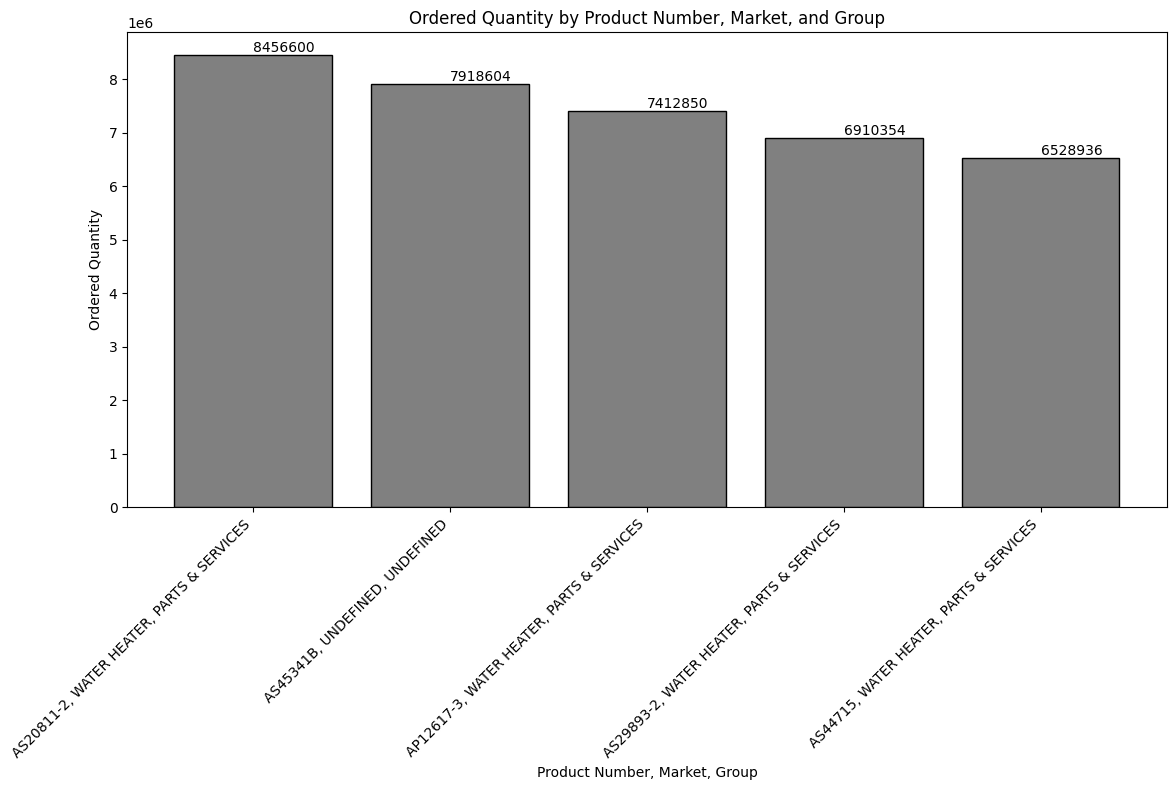

In [ ]:

from matplotlib import pyplot as plt
import numpy as np


ordered_quantity = top_5_details['Ordered Quantity']
product_numbers = top_5_details['Product Number']
product_market = top_5_details['Product Market']
product_group = top_5_details['Product Group']


combined_categories = [f"{p}, {m}, {g}" for p, m, g in zip(product_numbers, product_market, product_group)]

x = np.arange(len(combined_categories))
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(x, ordered_quantity, color='gray', edgecolor='black')


ax.set_xlabel('Product Number, Market, Group')
ax.set_ylabel('Ordered Quantity')
ax.set_title('Ordered Quantity by Product Number, Market, and Group')
ax.set_xticks(x)
ax.set_xticklabels(combined_categories, rotation=45, ha='right')


for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom') 

plt.tight_layout()
plt.show()

## Figuring out the flow of data; Is it a **Trendy or a Seasonal** Data?

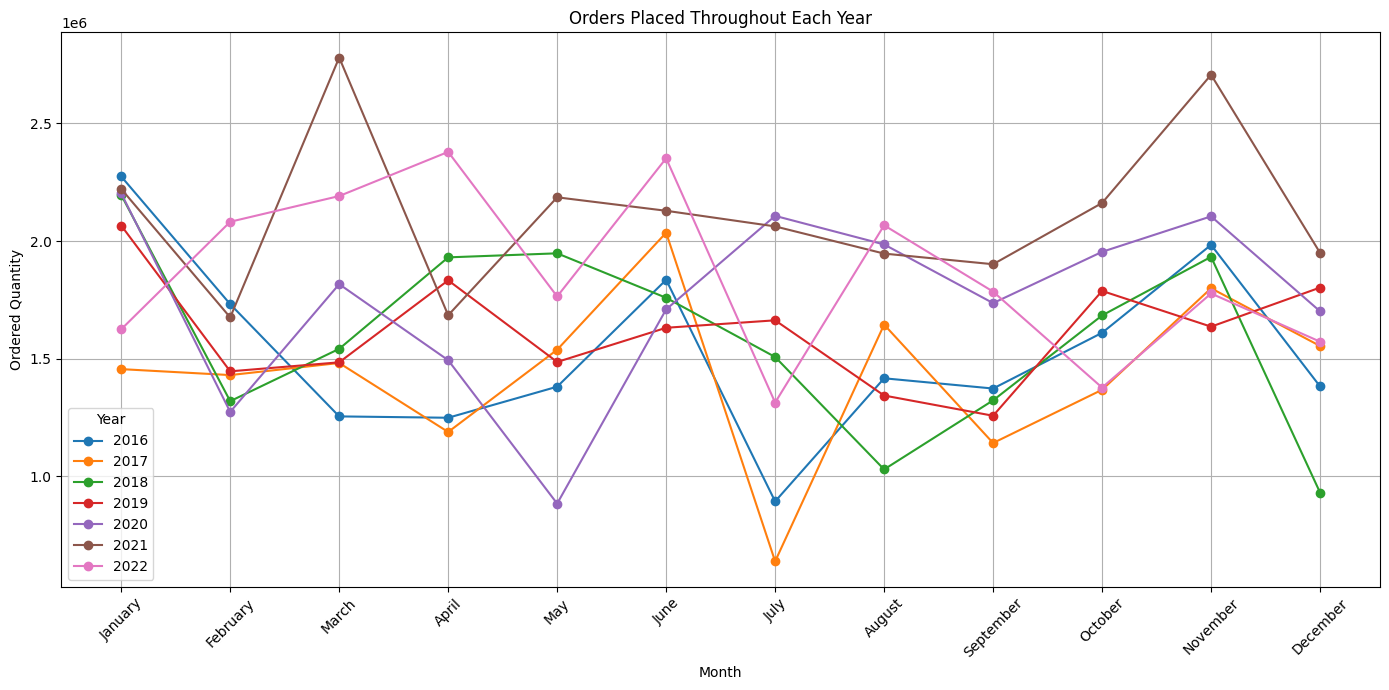

In [ ]:
df = pd.DataFrame(data_2016_2022)


# Group by Year and Month Name, then sum Ordered Quantity
grouped = df.groupby(['Year', 'Month Name'])['Ordered Quantity'].sum().unstack(level=0)

# Sorting the index to ensure months are in order
grouped = grouped.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Plotting
plt.figure(figsize=(14, 7))
for year in grouped.columns:
    plt.plot(grouped.index, grouped[year], marker='o', label=str(year))

plt.xlabel('Month')
plt.ylabel('Ordered Quantity')
plt.title('Orders Placed Throughout Each Year')
plt.legend(title='Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

to check:

In [ ]:
jan = data_2016_2022[(data_2016_2022['Year']==2016) & (data_2016_2022['Month Name'] == 'January') & (data_2016_2022['Ordered Quantity'])]
jan_orders = jan['Ordered Quantity'].sum()
feb = data_2016_2022[(data_2016_2022['Year']==2016) & (data_2016_2022['Month Name'] == 'February') & (data_2016_2022['Ordered Quantity'])]
feb_orders = feb['Ordered Quantity'].sum()
difference = jan_orders-feb_orders
print(f"{jan_orders} , {feb_orders} , {difference}" )

2274592.0 , 1731900.0 , 542692.0


In [ ]:
import plotly.graph_objects as go

df = pd.DataFrame(data_2016_2022)

# Group by Year and Month Name, then sum Ordered Quantity
grouped = df.groupby(['Year', 'Month Name'])['Ordered Quantity'].sum().unstack(level=0)

# Sorting the index to ensure months are in order
grouped = grouped.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Plotting with Plotly
fig = go.Figure()

for year in grouped.columns:
    fig.add_trace(go.Scatter(x=grouped.index, y=grouped[year], mode='lines+markers', name=str(year)))

fig.update_layout(
    title='Orders Placed Throughout Each Year',
    xaxis_title='Month',
    yaxis_title='Ordered Quantity',
    xaxis=dict(tickmode='array', tickvals=list(grouped.index), ticktext=grouped.index),
    legend_title='Year'
)

fig.show()

In [ ]:

df = pd.DataFrame(data_2016_2022)

# Group by Year and Week Number, then sum Ordered Quantity
grouped = df.groupby([ 'Week Number','Year'])['Ordered Quantity'].sum().unstack(level=1)
# week = df.groupby(['Week Number'])['Ordered Quantity'].sum().unstack()

# Plotting with Plotly
fig = go.Figure()

for year in grouped.columns:
    fig.add_trace(go.Scatter(x=grouped.index, y=grouped[year], mode='lines+markers', name=str(year)))

fig.update_layout(
    title='Orders Placed Throughout Each Year',
    xaxis_title='Week Number',
    yaxis_title='Ordered Quantity',
    xaxis=dict(tickmode='linear', tick0=1, dtick=1),  # Display ticks for each week number
    yaxis=dict(tickformat=','),)

fig.show()

In [ ]:
wo = data_2016_2022[(data_2016_2022['Year']==2016)  & (data_2016_2022['Ordered Quantity']) & (data_2016_2022['Week Number'] == 1)]
wo = wo['Ordered Quantity'].sum()
wo
# two = data_2016_2022[(data_2016_2022['Year']==2016) & (data_2016_2022['Week Number'] == '2') & (data_2016_2022['Ordered Quantity'])]
# two_orders = feb['Ordered Quantity'].sum()
# difference = one_orders-two_orders
# print(f"{one_orders} , {two_orders} , {difference}" )

np.float64(4165.0)

In [ ]:
weekly_data = unique_products.groupby(['Week Number', 'Product Number'])['Ordered Quantity'].sum().reset_index()

# Sort the data within each week by Ordered Quantity
weekly_data_sorted = weekly_data.sort_values(['Week Number', 'Ordered Quantity'], ascending=[True, False])

# Get the top 10 products per week
top_10_per_week = weekly_data_sorted.groupby('Week Number').head(10)

# Pivot the data to get Week Number on the x-axis and Ordered Quantity on the y-axis
pivot_data = top_10_per_week.pivot(index='Week Number', columns='Product Number', values='Ordered Quantity')


import plotly.graph_objects as go

# Initialize the figure
fig = go.Figure()

# Loop through each product number and plot the data
for product in pivot_data.columns:
    fig.add_trace(go.Scatter(
        x=pivot_data.index,
        y=pivot_data[product],
        mode='lines+markers',
        name=f'Product {product}'
    ))

# Update layout
fig.update_layout(
    title='Top 10 Products Ordered Quantity Per Week',
    xaxis_title='Week Number',
    yaxis_title='Ordered Quantity',
    xaxis=dict(tickmode='linear', tick0=1, dtick=1),  # Display ticks for each week number
    yaxis=dict(tickformat=','),
    height=600,
    width=1200
)

# Show the plot
fig.show()




In [ ]:
import pandas as pd
import plotly.express as px


df = data_2016_2022.groupby(['Year', 'Week Number', 'Product Number'])['Ordered Quantity'].sum().reset_index()

# Create a combined 'Year-Week' column
df['Year-Week'] = df['Year'].astype(str) + '-W' + df['Week Number'].astype(str).str.zfill(2)

# Aggregate total ordered quantity by product number
product_totals = df.groupby('Product Number')['Ordered Quantity'].sum()

# Get top 50 products (or fewer if there aren't 50)
top_products = product_totals.nlargest(50).index

# Filter data to include only top 50 products
filtered_df = df[df['Product Number'].isin(top_products)]

# Pivot the filtered data for plotting
pivot_df = filtered_df.pivot_table(index='Year-Week', columns='Product Number', values='Ordered Quantity', fill_value=0).reset_index()

# Melt the DataFrame to long format for Plotly
melted_df = pivot_df.melt(id_vars='Year-Week', var_name='Product Number', value_name='Ordered Quantity')

# Create interactive stacked bar chart using Plotly
fig = px.bar(
    melted_df,
    x='Year-Week',
    y='Ordered Quantity',
    color='Product Number',
    title='Ordered Quantity by Week and Top 50 Product Numbers',
    labels={'Ordered Quantity': 'Ordered Quantity', 'Year-Week': 'Year-Week'},
    text='Ordered Quantity'
)

# Update layout for better appearance
fig.update_layout(
    barmode='stack',
    xaxis_title='Year-Week',
    yaxis_title='Ordered Quantity',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()


# Top 50 products ordered by weeks in years

In [ ]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

barchart_week_df = data_2016_2022.groupby(['Year', 'Week Number', 'Product Number'])['Ordered Quantity'].sum().reset_index()

# Create a combined 'Year-Week' column
barchart_week_df['Year-Week'] = barchart_week_df['Year'].astype(str) + '-W' + barchart_week_df['Week Number'].astype(str).str.zfill(2)

# Aggregate total ordered quantity by product number
product_totals = barchart_week_df.groupby('Product Number')['Ordered Quantity'].sum()

# Get top 50 products (or fewer if there aren't 50)
top_products = product_totals.nlargest(50).index

# Initialize Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Ordered Quantity Dashboard"),
    
    # Dropdown for Year Filter
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in barchart_week_df['Year'].unique()],
        value=barchart_week_df['Year'].unique().tolist(),  # Default value is all years
        multi=True
    ),
    
    # Dropdown for Product Filter
    dcc.Dropdown(
        id='product-dropdown',
        options=[{'label': product, 'value': product} for product in top_products],
        value=top_products.tolist(),  # Default value is all products
        multi=True
    ),
    
    # Graph for the Stacked Bar Chart
    dcc.Graph(id='bar-chart')
])

@app.callback(
    Output('bar-chart', 'figure'),
    [Input('year-dropdown', 'value'),
     Input('product-dropdown', 'value')]
)
def update_chart(selected_years, selected_products):
    # Filter data based on selected years and products
    filtered_df = barchart_week_df[
        (barchart_week_df['Year'].isin(selected_years)) &
        (barchart_week_df['Product Number'].isin(selected_products))
    ]
    
    # Pivot the filtered data for plotting
    pivot_df = filtered_df.pivot_table(index='Year-Week', columns='Product Number', values='Ordered Quantity', fill_value=0).reset_index()
    
    # Melt the DataFrame to long format for Plotly
    melted_df = pivot_df.melt(id_vars='Year-Week', var_name='Product Number', value_name='Ordered Quantity')
    
    # Create interactive stacked bar chart using Plotly
    fig = px.bar(
        melted_df,
        x='Year-Week',
        y='Ordered Quantity',
        color='Product Number',
        title='Ordered Quantity by Week and Year',
        labels={'Ordered Quantity': 'Ordered Quantity', 'Year-Week': 'Year-Week'},
        text='Ordered Quantity'
    )
    
    # Update layout for better appearance
    fig.update_layout(
        barmode='stack',
        xaxis_title='Year-Week',
        yaxis_title='Ordered Quantity',
        xaxis_tickangle=-45
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8049)


In [ ]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

week_df = data_2016_2022.groupby(['Year', 'Week Number', 'Product Number'])['Ordered Quantity'].sum().reset_index()

# Initialize Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Top 5 Products Pie Chart"),
    
    # Dropdown for Year Filter
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in week_df['Year'].unique()],
        value=week_df['Year'].unique()[0],  # Default value is the first year
        multi=False
    ),
    
    # Dropdown for Week Number Filter
    dcc.Dropdown(
        id='week-dropdown',
        options=[{'label': f'Week {week}', 'value': week} for week in week_df['Week Number'].unique()],
        value=week_df['Week Number'].unique()[0],  # Default value is the first week
        multi=False
    ),
    
    # Graph for the Pie Chart
    dcc.Graph(id='pie-chart')
])

@app.callback(
    Output('pie-chart', 'figure'),
    [Input('year-dropdown', 'value'),
     Input('week-dropdown', 'value')]
)
def update_pie_chart(selected_year, selected_week):
    # Filter data based on selected year and week
    filtered_df = week_df[
        (week_df['Year'] == selected_year) &
        (week_df['Week Number'] == selected_week)
    ]
    
    # Get top 5 products by ordered quantity
    top_5_products = filtered_df.nlargest(5, 'Ordered Quantity')
    
    # Create pie chart using Plotly
    fig = px.pie(
        top_5_products,
        names='Product Number',
        values='Ordered Quantity',
        title=f'Top 5 Products in Week {selected_week} of {selected_year}'
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8050)


In [ ]:
week_df.columns

Index(['Year', 'Week Number', 'Product Number', 'Ordered Quantity'], dtype='object')

In [ ]:
pie_month_df = data_2016_2022.groupby(['Year', 'Month Name', 'Product Number'])['Ordered Quantity'].sum().reset_index()


In [ ]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output


# Initialize Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Top 5 Products Pie Chart by Month and Year"),
    
    # Dropdown for Year Filter
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in pie_month_df['Year'].unique()],
        value=pie_month_df['Year'].unique()[0],  # Default value is the first year
        multi=False
    ),
    
    # Dropdown for Month Filter
    dcc.Dropdown(
        id='month-dropdown',
        options=[{'label': month, 'value': month} for month in pie_month_df['Month Name'].unique()],
        value=pie_month_df['Month Name'].unique()[0],  # Default value is the first month
        multi=False
    ),
    
    # Graph for the Pie Chart
    dcc.Graph(id='pie-chart')
])

@app.callback(
    Output('pie-chart', 'figure'),
    [Input('year-dropdown', 'value'),
     Input('month-dropdown', 'value')]
)
def update_pie_chart(selected_year, selected_month):
    # Filter data based on selected year and month
    filtered_df = pie_month_df[
        (pie_month_df['Year'] == selected_year) &
        (pie_month_df['Month Name'] == selected_month)
    ]
    
    # Get top 5 products by ordered quantity
    top_5_products = filtered_df.nlargest(5, 'Ordered Quantity')
    
    # Create pie chart using Plotly
    fig = px.pie(
        top_5_products,
        names='Product Number',
        values='Ordered Quantity',
        title=f'Top 5 Products in {selected_month} {selected_year}'
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


In [ ]:
jan_2016_products =  pie_month_df[
        (pie_month_df['Year'] == 2016) &
        (pie_month_df['Month Name'] == 'January')
    ]
jan_2016_products.nlargest(5,'Ordered Quantity')

,Year,Month Name,Product Number,Ordered Quantity
10914,2016,January,AS29893-2,240000.0
10893,2016,January,AS20811-2,172000.0
10814,2016,January,AP12617-3,117500.0
11011,2016,January,AS45341A,105000.0
10982,2016,January,AS42196,88000.0


# SOME PRODUCTS APPEAR ONE - TWO TIME

In [ ]:
one_time_product = unique_products[unique_products['Product Number']=='AP9154G']
one_time_product

,Year,Week Number,Product Number,Week Start Date,Month Name,Ordered Quantity
71473,2017,1,AP9154G,2017-01-01,January,40000.0


In [ ]:
two_time_product = unique_products[unique_products['Product Number']=='4110711']
two_time_product

,Year,Week Number,Product Number,Week Start Date,Month Name,Ordered Quantity
369202,2021,21,4110711,2021-05-16,May,42740.0
370409,2021,22,4110711,2021-05-23,May,84900.0
